In [4]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env
import wrangle

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
#sql query
sql = """
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount,fips
FROM properties_2017
WHERE propertylandusetypeid = 261

"""

In [3]:
#connection setup
def conn(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [4]:
#make function to acquire from sql
def new_zillow_data():
    #pull data from sql
    df = pd.read_sql(sql,conn("zillow"))
    return df

def get_zillow_data():
    if os.path.isfile("zillow.csv"):
        #if csv is present locally, pull locally
        df = pd.read_csv("zillow.csv", index_col = 0)
    else:
        #if csv not present locally, use function to pull from sql
        df = new_zillow_data()
        df.to_csv("zillow.csv")
    return df

In [5]:
#acquire dataframe
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful

In [6]:
#show info with counts
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [7]:
#see numerical values of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [8]:
#check which columns has null
df.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [10]:
#sum of null column wise
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [6]:
# find what percentage are those null
df.isna().mean().mul(100)

bedroomcnt                      0.000511
bathroomcnt                     0.000511
calculatedfinishedsquarefeet    0.394080
taxvaluedollarcnt               0.022900
yearbuilt                       0.433702
taxamount                       0.206330
fips                            0.000000
dtype: float64

all null values in each columns are less than 0.5% of our dataset. we can remove those nulls without impcating our data

In [7]:
#drop all the null and assign it back 
df=df.dropna()

In [8]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  float64
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  float64
 3   taxvaluedollarcnt             2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  float64
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


In [9]:
#see whats insise bedroom count
df.bedroomcnt.value_counts()

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

we should change float values of bedroom to int, cannot have decimal value

In [15]:
#convert datatype float to int
df.bedroomcnt = df.bedroomcnt.astype("int64")

In [26]:
#value count for bathroom
df.bathroomcnt.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64

we can have bathroom in full, hlaf or in three quarter? crazy, so we will not cast it to int

In [28]:
#get value count
df.calculatedfinishedsquarefeet.value_counts()

1200.0     5184
1080.0     4376
1120.0     4354
1400.0     3828
1440.0     3684
           ... 
10180.0       1
13169.0       1
9095.0        1
10525.0       1
24920.0       1
Name: calculatedfinishedsquarefeet, Length: 10557, dtype: int64

all values after decimals seem to be zero. we can convert it to int. first lets see if we lose value

In [18]:
#divide mean of float value by mean of value casted into int
(df.calculatedfinishedsquarefeet.mean())/(df.calculatedfinishedsquarefeet.astype("int64").mean())

1.0

In [19]:
#there is no data loss so we can convert float to int
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype("int64")

In [11]:
#value counts
df.taxvaluedollarcnt.value_counts()

450000.0    820
500000.0    774
400000.0    723
430000.0    690
440000.0    683
           ... 
729523.0      1
940139.0      1
545367.0      1
38804.0       1
536061.0      1
Name: taxvaluedollarcnt, Length: 588178, dtype: int64

we can convert this float to int, first lets see if we lose data during conversion

In [20]:
# divide average value with float by average value with int
df.taxvaluedollarcnt.mean()/df.taxvaluedollarcnt.astype("int64").mean()

1.0

In [21]:
# no loss in data so cast it to into int
df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype("int64")

In [12]:
#value count for yearbuilt
df.yearbuilt.value_counts()

1955.0    84329
1950.0    71606
1954.0    69069
1953.0    62270
1956.0    61858
          ...  
1855.0        1
1879.0        1
1833.0        1
1840.0        1
1874.0        1
Name: yearbuilt, Length: 153, dtype: int64

In [22]:
#divide mean of float value by its value to see data loss
df.yearbuilt.mean()/df.yearbuilt.astype("int64").mean()

1.0

In [23]:
#since there is no data loss, convert the column to int
df.yearbuilt = df.yearbuilt.astype("int64")

In [13]:
#value count for taxamount. it seems to continous data so we will not convert it
df.taxamount.value_counts()

345.72      172
344.18       76
343.52       74
49.18        46
388.18       37
           ... 
8191.38       1
11627.92      1
15008.68      1
9227.22       1
13494.52      1
Name: taxamount, Length: 915868, dtype: int64

In [14]:
#value count of fips
df.fips.value_counts()

6037.0    1425207
6059.0     552057
6111.0     162971
Name: fips, dtype: int64

In [24]:
# convert it into int 
df.fips = df.fips.astype("int64")

In [25]:
#how did casting work?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(2), int64(5)
memory usage: 130.6 MB


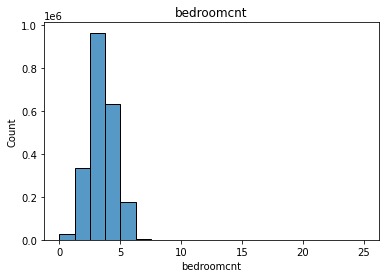

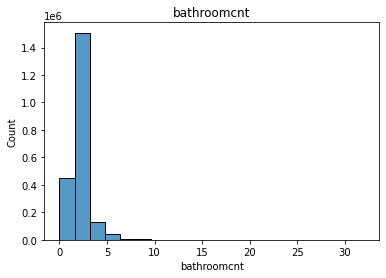

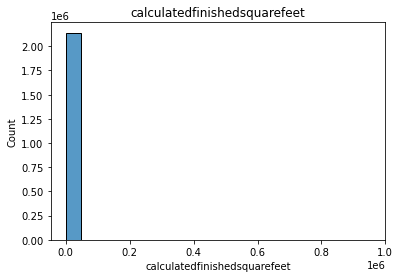

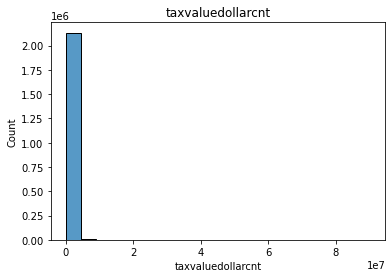

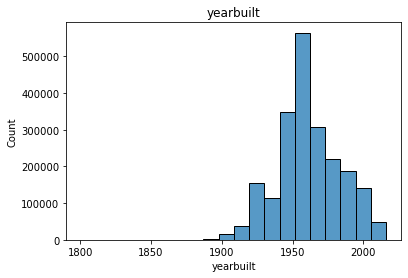

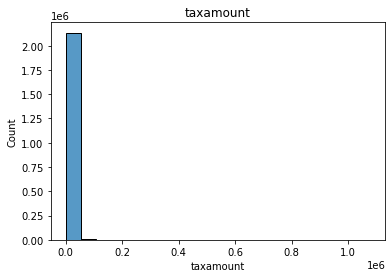

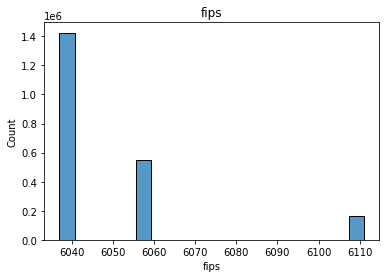

In [56]:
#plot histoplot to see distribution of data
for i in df.columns:
    sns.histplot(df[i], bins = 20)
    plt.title(i)
    plt.show()